In [13]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from matplotlib import patches
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.ticker as mtick
from AWNN import AWNN
from KNN import KNN
from AKDE import AKDE

# demo

In [4]:
from scipy.stats import multivariate_normal
import numpy as np

Generate some random data, following multivariatenormal distribution

In [5]:
# setting and sampling
dim=2
n_train=1000
n_test=100 # 100*100
np.random.seed(2)
interval_l,interval_u=-3.5,3.5

In [6]:
means=[np.zeros(dim)+1.5,np.zeros(dim)-1.5]
covs=[np.diag(np.ones(dim)*0.4),np.diag(np.ones(dim)*0.7)]

prob_seq = [0.4,0.6]
num_mix=2

#sampling
rd_idx=np.random.choice(num_mix,size=n_train,replace=True,p=prob_seq)
sample_X=[]


for i in range(num_mix):
    num_i=np.sum(rd_idx==i)
    sample_Xi=multivariate_normal.rvs(mean=means[i],cov=covs[i],size=n_train).reshape(-1,dim)
    sample_X.append(sample_Xi)

X_train=np.concatenate(sample_X,axis=0)
np.random.shuffle(X_train)

#caculate the density at given vector of point

num_sample=X_train.shape[0]
pdf_X_train=np.zeros(num_sample, dtype=np.float64) 
for i in range(num_mix):
    prob=prob_seq[i]
    density_i=multivariate_normal.pdf(X_train, mean=means[i], cov=covs[i])
    pdf_X_train+=prob*density_i


In [11]:
X_test_1=np.linspace(interval_l,interval_u,n_test)
X_test_2=np.linspace(interval_l,interval_u,n_test)

axis1,axis2=np.meshgrid(X_test_1,X_test_2)
X_test=np.array([axis1.ravel(),axis2.ravel()]).T

num_samples=X_test.shape[0]
pdf_X_test=np.zeros(num_samples,dtype=np.float64)
for i in range(num_mix):
    prob=prob_seq[i]
    density_i=multivariate_normal.pdf(X_test, mean=means[i], cov=covs[i])
    pdf_X_test+=prob*density_i
pdf_X_test=pdf_X_test.reshape(-1,n_test)

In [14]:
#produce estimation
#AWNN
## produce estimation
# AWNN
model_AWNN=AWNN(C=.1).fit(X_train)
est_AWNN=np.exp(model_AWNN.predict(X_test).reshape(-1,n_test))
# KNN
model_KNN=KNN(k=40).fit(X_train,method="KNN")
est_KNN=np.exp(model_KNN.predict(X_test).reshape(-1,n_test))
# WKNN
model_WKNN=KNN(k=40).fit(X_train,method="WKNN")
est_WKNN=np.exp(model_WKNN.predict(X_test).reshape(-1,n_test))

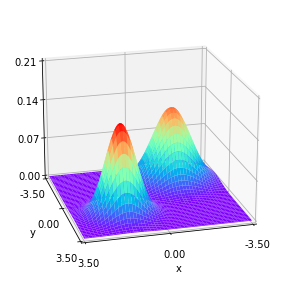

In [15]:
## poplation 
# creat surface


fig = plt.figure(figsize=(7,5))

ax = fig.add_subplot(111,projection = '3d')


surf=ax.plot_surface(axis1, axis2, pdf_X_test, cmap=plt.get_cmap('rainbow'),alpha=1)
# set axis and text 
_=ax.set_xlim(interval_l,interval_u)
ax.xaxis.set_major_locator(LinearLocator(3)) 
ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=ax.set_ylim(interval_l,interval_u)
ax.yaxis.set_major_locator(LinearLocator(3)) 
ax.yaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=ax.set_zlim(0,0.21)
ax.zaxis.set_major_locator(LinearLocator(4)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=plt.xlabel("x")
_=plt.ylabel("y")


# view 
ax.view_init(elev=20,azim=75)


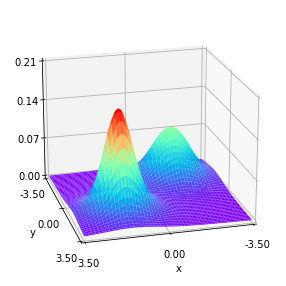

In [16]:
## AWNN 
# creat surface
fig = plt.figure(figsize=(7,5))

ax = fig.add_subplot(111,projection = '3d')
surf=ax.plot_surface(axis1, axis2, est_AWNN, cmap=plt.get_cmap('rainbow'),alpha=1)
# set axis and text 
_=ax.set_xlim(interval_l,interval_u)
ax.xaxis.set_major_locator(LinearLocator(3)) 
ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=ax.set_ylim(interval_l,interval_u)
ax.yaxis.set_major_locator(LinearLocator(3)) 
ax.yaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=ax.set_zlim(0,0.21)
ax.zaxis.set_major_locator(LinearLocator(4)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=plt.xlabel("x")
_=plt.ylabel("y")

# view 
ax.view_init(elev=20,azim=75)

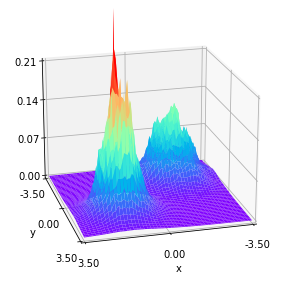

In [17]:
## KNN 
# creat surface
fig = plt.figure(figsize=(7,5))

ax = fig.add_subplot(111,projection = '3d')
surf=ax.plot_surface(axis1, axis2, est_KNN, cmap=plt.get_cmap('rainbow'),alpha=1)
# set axis and text 
_=ax.set_xlim(interval_l,interval_u)
ax.xaxis.set_major_locator(LinearLocator(3)) 
ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=ax.set_ylim(interval_l,interval_u)
ax.yaxis.set_major_locator(LinearLocator(3)) 
ax.yaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=ax.set_zlim(0,0.21)
ax.zaxis.set_major_locator(LinearLocator(4)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=plt.xlabel("x")
_=plt.ylabel("y")


# view 
ax.view_init(elev=20,azim=75)

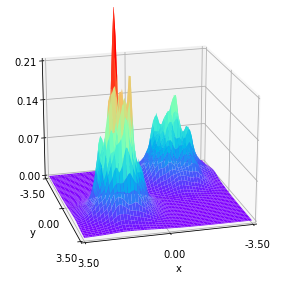

In [18]:
## WKNN 
# creat surface
fig = plt.figure(figsize=(7,5))

ax = fig.add_subplot(111,projection = '3d')
surf=ax.plot_surface(axis1, axis2, est_WKNN, cmap=plt.get_cmap('rainbow'),alpha=1)
# set axis and text 
_=ax.set_xlim(interval_l,interval_u)
ax.xaxis.set_major_locator(LinearLocator(3)) 
ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=ax.set_ylim(interval_l,interval_u)
ax.yaxis.set_major_locator(LinearLocator(3)) 
ax.yaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=ax.set_zlim(0,0.21)
ax.zaxis.set_major_locator(LinearLocator(4)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=plt.xlabel("x")
_=plt.ylabel("y")

# view 
ax.view_init(elev=20,azim=75)
